<a href="https://colab.research.google.com/github/Adhi1755/SanctionImpact/blob/main/AI_Based_Classification_of_Sanction_Severity_Using_Policy_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI-Based Classification of Sanction Severity Using Policy Text**

This notebook performs NLP-based classification of sanction severity
(High / Medium / Low) using official sanctions policy documents.

In [1]:
import pandas as pd
import numpy as np

# NLP & ML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Sanctions Impact - Merged.csv to Sanctions Impact - Merged.csv


In [3]:
df = pd.read_csv("Sanctions Impact - Merged.csv")
df.head()

,DATE,COUNTRY,SOURCE,HEADLINE,SUMMARY,TEXT,IMPACT SCORE,IMPACT LEVEL
0,3/17/1995,Iran,https://www.federalregister.gov/documents/1995...,Prohibiting Certain Transactions With Respect ...,"Prohibits U.S. persons from entering into, fin...",Prohibiting Certain Transactions With Respect ...,1.0,Low
1,3/18/1995,Iran,https://www.federalregister.gov/documents/2011...,Authorizing the Imposition of Certain Sanction...,Authorizes sanctions on individuals or entitie...,Authorizing the Imposition of Certain Sanction...,2.0,Medium
2,3/19/1995,Iran,https://www.federalregister.gov/documents/2012...,Prohibiting Certain Transactions With and Susp...,Blocks U.S.-based property and transactions of...,Prohibiting Certain Transactions With and Susp...,3.0,Medium
3,3/20/1995,Iran,https://www.federalregister.gov/documents/2012...,Prohibiting Certain Transactions With and Susp...,Authorizes prohibitions on all transactions wi...,Prohibiting Certain Transactions With and Susp...,1.0,Low
4,3/21/1995,Iran,https://www.presidency.ucsb.edu/documents/exec...,Authorizing Additional Sanctions With Respect ...,Allows sanctions on foreign financial institut...,Authorizing Additional Sanctions With Respect ...,5.0,High


In [6]:
print("Total Rows:", len(df))
print("\nImpact Level Distribution:")
print(df['IMPACT LEVEL'].value_counts())

Total Rows: 202

Impact Level Distribution:
IMPACT LEVEL
Medium    89
High      83
Low       29
Name: count, dtype: int64


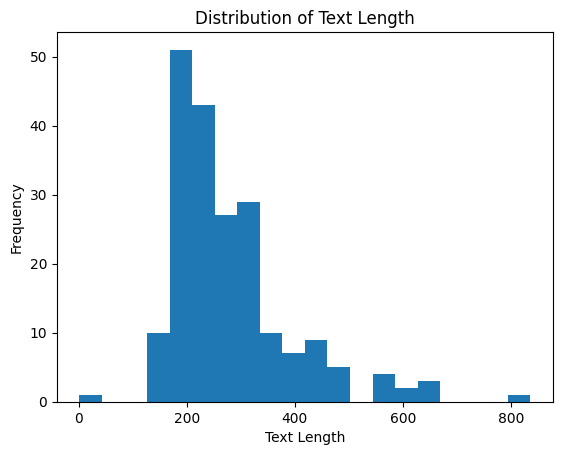

In [8]:
df['text_length'] = df['TEXT'].apply(len)

plt.hist(df['text_length'], bins=20)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()
